# Clustering avec KMeans
## Dataset : Facebook Live Sellers in Thailand

Objectif :
- Appliquer un algorithme de clustering (KMeans)
- Visualiser les clusters
- Analyser les individus par cluster

Source des données :
https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand


In [1]:
import pandas as pd

df = pd.read_csv("live.csv")
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status
0,529,512,262,432,92,3,1,1,0,1
1,150,0,0,150,0,0,0,0,0,2
2,227,236,57,204,21,1,1,0,0,3
3,111,0,0,111,0,0,0,0,0,4
4,213,0,0,204,9,0,0,0,0,5


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  7050 non-null   int64
 1   num_comments   7050 non-null   int64
 2   num_shares     7050 non-null   int64
 3   num_likes      7050 non-null   int64
 4   num_loves      7050 non-null   int64
 5   num_wows       7050 non-null   int64
 6   num_hahas      7050 non-null   int64
 7   num_sads       7050 non-null   int64
 8   num_angrys     7050 non-null   int64
 9   status         7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


# CHOIX DES VARIABLES POUR LE CLUSTERING

In [3]:
features = df[
    ['num_reactions', 'num_comments', 'num_shares',
     'num_likes', 'num_loves']
]


Les variables choisies représentent l’engagement des utilisateurs
(réactions, commentaires, partages et likes).
Elles sont pertinentes pour regrouper les publications selon leur
niveau d’interaction.


# NORMALISATION

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


# KMEANS

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters


# PREMIÈRE VISUALISATION

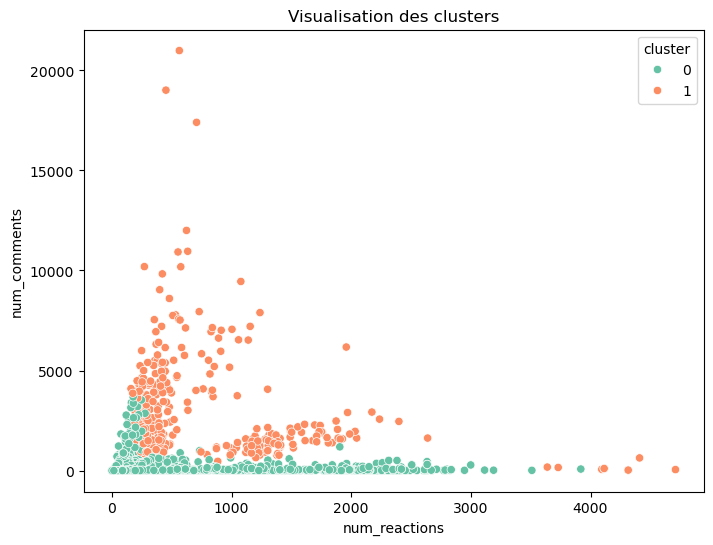

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['num_reactions'],
    y=df['num_comments'],
    hue=df['cluster'],
    palette='Set2'
)
plt.title("Visualisation des clusters")
plt.show()


# ANALYSE DES INDIVIDUS PAR CLUSTER

In [8]:
df.groupby('cluster').mean()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status
cluster,,,,,,,,,,
0,201.538599,83.919218,17.390473,194.157384,6.157683,0.640287,0.348813,0.167239,0.064954,3438.101538
1,772.300283,2888.677054,469.390935,611.280453,137.390935,13.603399,7.291785,1.694051,1.028329,5183.594901


# CHOIX DU NOMBRE DE CLUSTERS

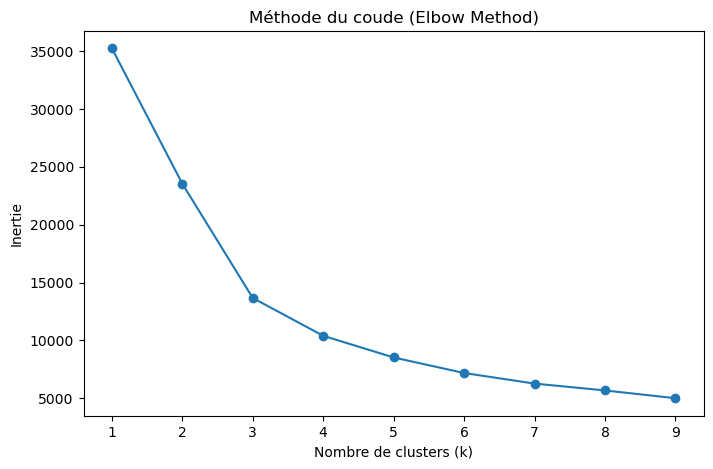

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude (Elbow Method)')
plt.show()


La méthode du coude permet de déterminer le nombre optimal de clusters.
On observe une diminution importante de l’inertie jusqu’à k = 2,
après quoi la baisse devient moins significative.
Ainsi, le choix de 2 clusters est justifié.


# REFAIRE KMEANS AVEC LE k FINAL

In [10]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


# VISUALISATION AVEC OPTIONS

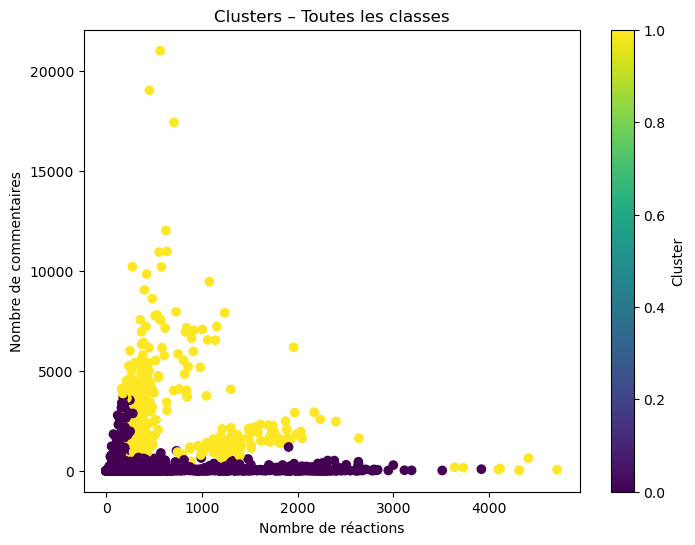

In [12]:
# Option 1 : Voir toutes les classes ensemble
plt.figure(figsize=(8,6))
plt.scatter(
    df['num_reactions'],
    df['num_comments'],
    c=df['cluster'],
    cmap='viridis'
)
plt.xlabel('Nombre de réactions')
plt.ylabel('Nombre de commentaires')
plt.title('Clusters – Toutes les classes')
plt.colorbar(label='Cluster')
plt.show()


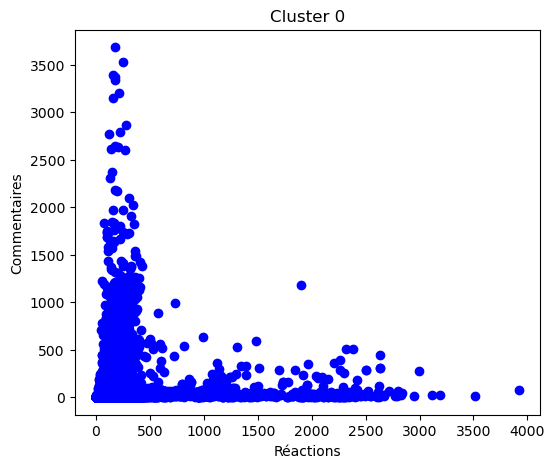

In [13]:
# Option 2 : Voir les classes séparément
cluster_0 = df[df['cluster'] == 0]

plt.figure(figsize=(6,5))
plt.scatter(
    cluster_0['num_reactions'],
    cluster_0['num_comments'],
    color='blue'
)
plt.title('Cluster 0')
plt.xlabel('Réactions')
plt.ylabel('Commentaires')
plt.show()


# LISTE DES INDIVIDUS PAR CLUSTER

In [14]:
df[['status', 'cluster']].head(10)


,status,cluster
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [16]:
# Option 2 : Individus par classe

df[df['cluster'] == 0][['status', 'num_reactions', 'num_comments']].head()
df[df['cluster'] == 1][['status', 'num_reactions', 'num_comments']].head()


,status,num_reactions,num_comments
99,100,1493,1979
166,167,4410,633
238,239,885,462
343,344,1379,769
413,414,446,6148
